Question 1 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")

seasons = data.groupby('Season_End_Year')
results_charts = []
champions = {}
results_champion = []

for season, season_data in seasons:
    teams = {}
    for colum, row in season_data.iterrows():
        if row['Home'] not in teams:
            teams[row['Home']] = {'points' : 0, 'goals' : 0}
        if row['Away'] not in teams:
            teams[row['Away']] = {'points' : 0, 'goals' : 0}

        if row['FTR'] == 'H':
            teams[row['Home']]['points'] += 3
            teams[row['Home']]['goals'] += row['HomeGoals']
            teams[row['Away']]['goals'] += row['AwayGoals']
        elif row['FTR'] == 'A':
            teams[row['Away']]['points'] += 3
            teams[row['Home']]['goals'] += row['HomeGoals']
            teams[row['Away']]['goals'] += row['AwayGoals']
        else:
            teams[row['Home']]['points'] += 1
            teams[row['Away']]['points'] += 1
            teams[row['Home']]['goals'] += row['HomeGoals']
            teams[row['Away']]['goals'] += row['AwayGoals']
    for team, data in teams.items():
        results_charts.append({f'Season' : season, 'Team' : team, 'Points' : data['points'], 'Goals' : data['goals']})

    max_point = max(teams.items(), key = lambda x: x[1]['points'])
    champions[season] = max_point[0]

for season, champion in champions.items():
    results_champion.append({'Season' : season, 'Champion' : champion})

results_charts_df = pd.DataFrame(results_charts)
results_champion_df = pd.DataFrame(results_champion)

results_champion_df

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_5716\1612231166.py:1: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_excel("D:\H\TranCongHau_N22DCCI010\Data\matches_use_3.xlsx")


,Season,Champion
0,2000,Manchester Utd
1,2001,Manchester Utd
2,2002,Arsenal
3,2003,Manchester Utd
4,2004,Arsenal
5,2005,Chelsea
6,2006,Chelsea
7,2007,Manchester Utd
8,2008,Manchester Utd
9,2009,Manchester Utd


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\tranc\AppData\Local\Temp\ipykernel_1948\1519146181.py:1: SyntaxWarning: invalid escape sequence '\H'
  champions_map = pd.read_csv("D:\H\TranCongHau_N22DCCI010\Python\Question 1\champion.csv")


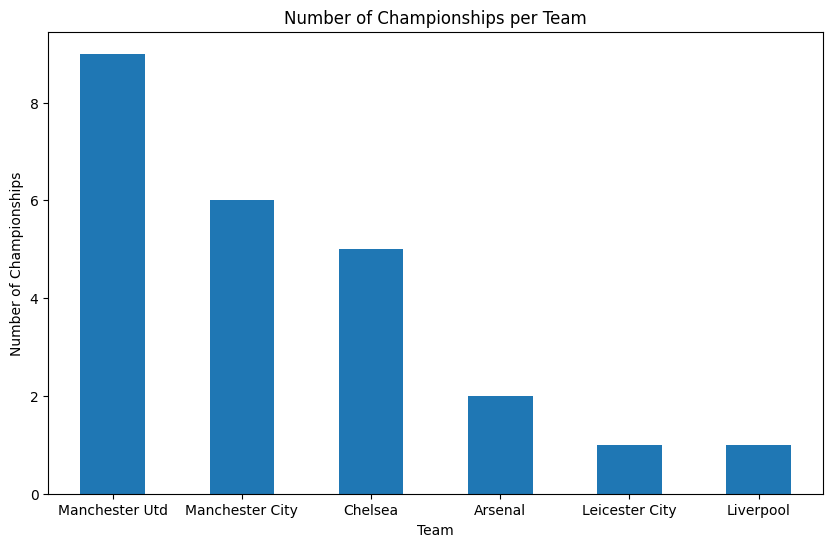

In [14]:
champions_map = pd.read_csv("D:\H\TranCongHau_N22DCCI010\Python\Question 1\champion.csv")
champion_counts = champions_map['Champion'].value_counts()

plt.figure(figsize=(10,6))
champion_counts.plot(kind='bar')
plt.title('Number of Championships per Team')
plt.xlabel('Team')
plt.ylabel('Number of Championships')
plt.xticks(rotation=0)
plt.show()